In [1]:
import pandas as pd
import numpy as np

In [2]:
data  = pd.read_csv('./diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35,0.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29,0.0,26.6,0.351,31,0
2,8.0,183.0,64.0,0,0.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0.0,137.0,40.0,35,168.0,43.1,2.288,33,1


In [8]:
data.info()
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 778
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               773 non-null    float64
 1   Glucose                   773 non-null    float64
 2   BloodPressure             773 non-null    float64
 3   SkinThickness             773 non-null    int64  
 4   Insulin                   773 non-null    float64
 5   BMI                       773 non-null    float64
 6   DiabetesPedigreeFunction  773 non-null    float64
 7   Age                       773 non-null    int64  
 8   Outcome                   773 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 762 entries, 0 to 778
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies          

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,3.853018,120.937008,69.076115,20.477690,79.452756,32.016010,0.471092,33.270341,0.350394
std,3.379916,32.009053,19.408926,15.972879,115.337423,7.893676,0.330522,11.753955,0.477407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,24.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.600000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128323,0.140910,-0.081698,-0.074594,0.015002,-0.033553,0.545183,0.220893
Glucose,0.128323,1.000000,0.152523,0.057543,0.330895,0.220808,0.140553,0.264996,0.469153
BloodPressure,0.140910,0.152523,1.000000,0.207947,0.087301,0.281830,0.043192,0.241396,0.066041
SkinThickness,-0.081698,0.057543,0.207947,1.000000,0.436549,0.393729,0.178753,-0.117799,0.073316
Insulin,-0.074594,0.330895,0.087301,0.436549,1.000000,0.196577,0.184315,-0.044044,0.130519
BMI,0.015002,0.220808,0.281830,0.393729,0.196577,1.000000,0.139635,0.032082,0.290403
DiabetesPedigreeFunction,-0.033553,0.140553,0.043192,0.178753,0.184315,0.139635,1.000000,0.026193,0.169573
Age,0.545183,0.264996,0.241396,-0.117799,-0.044044,0.032082,0.026193,1.000000,0.232963
Outcome,0.220893,0.469153,0.066041,0.073316,0.130519,0.290403,0.169573,0.232963,1.000000


In [12]:
x = data.iloc[:,:-1]
y = data.iloc[:, -1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=5)

In [14]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(solver='liblinear')
cls.fit(x_train, y_train)


LogisticRegression(solver='liblinear')

In [17]:
y_pred = cls.predict(x_test)
comp = pd.DataFrame(y_test)
comp['Pred'] = y_pred
comp.tail()

,Outcome,Pred
157,0,0
451,1,1
160,0,0
758,0,0
138,0,0


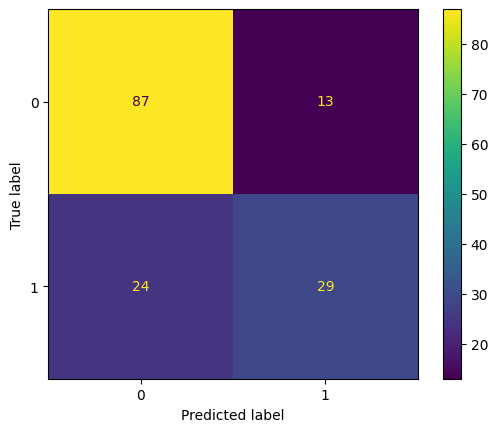

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm_disp = ConfusionMatrixDisplay(cm )
cm_disp.plot()


In [22]:
accuracy_score(y_test, y_pred)

0.7581699346405228

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.69      0.55      0.61        53

    accuracy                           0.76       153
   macro avg       0.74      0.71      0.72       153
weighted avg       0.75      0.76      0.75       153

